In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
# Loading Dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
# so it has 100000 samples and every sample is a 28x28 grayscale image

In [7]:
y_train.shape

(60000,)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:

y_train.max()

np.uint8(9)

In [10]:
y_train.min()

np.uint8(0)

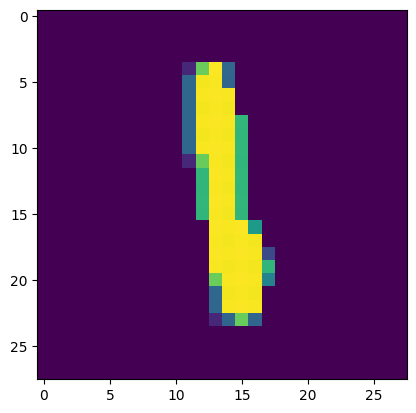

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[200])

In [12]:
# SO it is multiclass classification problem
# and the array range is from 0 to 9
# I have to scale this from 0-255 to 0-1 

In [13]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [14]:
X_train[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train.min()

np.float32(0.0)

In [16]:
X_train.max()

np.float32(1.0)

In [17]:
# so scaling is done

In [18]:
X_test.shape

(10000, 28, 28)

In [19]:
# so it is in two dimensions I need to convert it to one dimension
# I'm going to use Flatten class from keras
# also train my neural network

In [20]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) # here I use this to convert the 2D images to 1D
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\Rafin\Desktop\House Prices\ds_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9156 - loss: 0.2881 - val_accuracy: 0.9567 - val_loss: 0.1496
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9627 - loss: 0.1232 - val_accuracy: 0.9647 - val_loss: 0.1171
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9740 - loss: 0.0847 - val_accuracy: 0.9706 - val_loss: 0.0984
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9806 - loss: 0.0641 - val_accuracy: 0.9718 - val_loss: 0.0960
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0518 - val_accuracy: 0.9723 - val_loss: 0.0962
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0406 - val_accuracy: 0.9732 - val_loss: 0.1026
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0342 - val_accuracy: 0.9733 - val_loss: 0.0994
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9913 - loss: 0.0276 - 

In [24]:
# so it done
# My pc taking 5 second to train 1500 parameters. I need to upgrade my pc


In [25]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [26]:
from sklearn.metrics import accuracy_score
y_pred = y_prob.argmax(axis=1)
accuracy_score(y_test,y_pred)

0.9773

In [27]:
# holly molly 97% it awesome

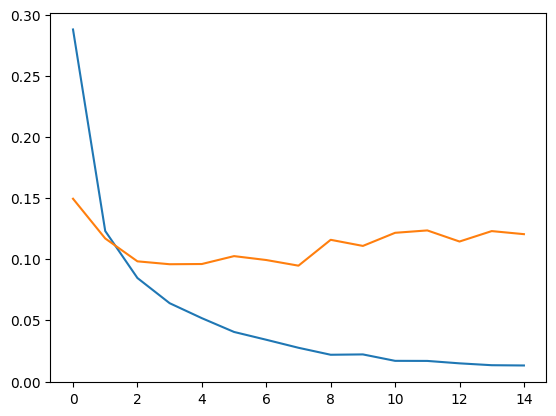

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

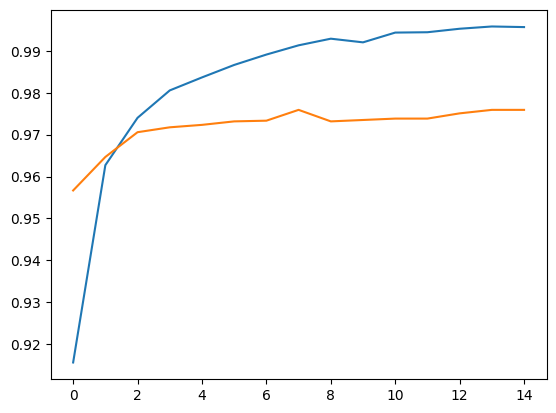

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

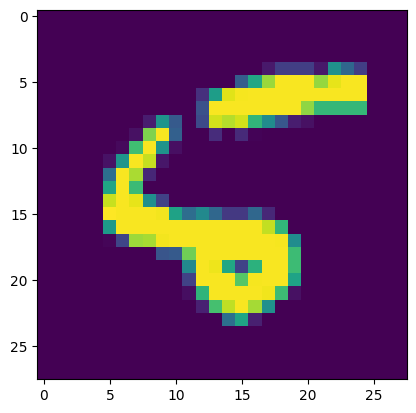

In [30]:
plt.imshow(X_test[8])